In [16]:
import pandas as pd
import numpy as np
from scipy.stats import norm
housing = pd.read_csv("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/data/Ames_Housing_Price_Data.csv", index_col=0)
housing.head() #OPEN DATA FRAME

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [17]:
#Create seperate numeric-set
housing_numeric = housing[['PID','GrLivArea','SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']].copy()
housing_numeric['PID'] = housing_numeric['PID'].astype('str')
housing_numeric = housing_numeric.fillna(0)

housing_numeric.to_pickle('housing_numeric.pkl')
housing_numeric

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1,909176150,856,126000,0.0,7890,0.0,238.0,0.0,618.0,856.0,...,1,2.0,399.0,0,0,0,0,166,0,0
2,905476230,1049,139500,42.0,4235,149.0,552.0,393.0,104.0,1049.0,...,0,1.0,266.0,0,105,0,0,0,0,0
3,911128020,1001,124900,60.0,6060,0.0,737.0,0.0,100.0,837.0,...,0,1.0,216.0,154,0,42,86,0,0,0
4,535377150,1039,114000,80.0,8146,0.0,0.0,0.0,405.0,405.0,...,0,1.0,281.0,0,0,168,0,111,0,0
5,534177230,1665,227000,70.0,8400,0.0,643.0,0.0,167.0,810.0,...,0,2.0,528.0,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,0.0,8854,0.0,0.0,0.0,952.0,952.0,...,1,1.0,192.0,0,98,0,0,40,0,0
760,905402060,1733,139600,0.0,13680,0.0,0.0,0.0,0.0,0.0,...,1,2.0,452.0,0,0,0,0,0,0,0
761,909275030,2002,145000,82.0,6270,0.0,284.0,0.0,717.0,1001.0,...,0,3.0,871.0,0,0,0,0,0,0,0
762,907192040,1842,217500,0.0,8826,144.0,841.0,0.0,144.0,985.0,...,1,2.0,486.0,193,96,0,0,0,0,0


In [18]:
#Create seperate factor-set
housing_factor = housing.drop(['GrLivArea','SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF','FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis=1)
housing_factor['PavedDrive'] = housing_factor.PavedDrive.apply(lambda Paved: 1 if Paved != "N" else 0)
housing_factor['CentralAir'] = housing_factor.CentralAir.apply(lambda Central: 1 if Central != "N" else 0) #Convert Y/N to Booleon 
housing_factor[['PID','MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath']] = housing_factor[['PID','MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath']].astype(str)
housing_factor['YrSold'] = pd.to_datetime(housing_factor['YrSold']).dt.strftime('%Y')
housing_factor['GarageYrBlt'] = pd.to_datetime(housing_factor['GarageYrBlt']).dt.strftime('%Y')
housing_factor['YearBuilt'] = pd.to_datetime(housing_factor['YearBuilt']).dt.strftime('%Y')
housing_factor['YearRemodAdd'] = pd.to_datetime(housing_factor['YearRemodAdd']).dt.strftime('%Y')
housing_factor['MoSold'] = pd.to_datetime(housing_factor['MoSold'],format='%m').dt.strftime('%m')
housing_factor[['PavedDrive','CentralAir']] = housing_factor[['PavedDrive','CentralAir']].astype('bool')
housing_factor #transform all integers into categorical variables
housing_factor.dtypes[housing_factor.dtypes == 'int64']
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
1,909176150,30,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,...,TA,TA,True,NaN,NaN,NaN,03,1970,WD,Normal
2,905476230,120,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,True,NaN,NaN,NaN,02,1970,WD,Normal
3,911128020,30,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Po,False,NaN,NaN,NaN,11,1970,WD,Normal
4,535377150,70,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,...,TA,TA,False,NaN,NaN,NaN,05,1970,WD,Normal
5,534177230,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,True,NaN,NaN,NaN,11,1970,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,Fa,Po,True,NaN,NaN,NaN,05,1970,WD,Normal
760,905402060,20,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,...,TA,TA,True,NaN,NaN,NaN,06,1970,WD,Normal
761,909275030,90,RH,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,...,TA,TA,True,NaN,NaN,NaN,08,1970,WD,Normal
762,907192040,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,True,NaN,NaN,NaN,07,1970,WD,Normal


In [19]:
#Get rid of all NAs
housing_factor['MiscFeature'] = housing_factor['MiscFeature'].fillna('NoFeature')
housing_factor['PoolQC'] = housing_factor['PoolQC'].fillna('NoPool')
housing_factor['Fence'] = housing_factor['Fence'].fillna('NoFence')
housing_factor['GarageQual'] = housing_factor['GarageQual'].fillna('NoGarage')
housing_factor['GarageCond'] = housing_factor['GarageCond'].fillna('NoGarage')
housing_factor['GarageFinish'] = housing_factor['GarageFinish'].fillna('NoGarage')
housing_factor['GarageYrBlt'] = housing_factor['GarageYrBlt'].fillna('1970') #903426160 and 910201180 do have a garage built, but an NA for all others, filled with mode
housing_factor['GarageType'] = housing_factor['GarageType'].fillna('NoGarage')
housing_factor['FireplaceQu'] = housing_factor['FireplaceQu'].fillna('NoFireplace')
housing_factor['BsmtFinType2'] = housing_factor['BsmtFinType2'].fillna('NoBsmt') #528142130 has a basement, but NA for values
housing_factor['BsmtFinType1'] = housing_factor['BsmtFinType1'].fillna('NoBsmt')
housing_factor['BsmtExposure'] = housing_factor['BsmtExposure'].fillna('NoBsmt')
housing_factor['BsmtCond'] = housing_factor['BsmtCond'].fillna('NoBsmt')
housing_factor['BsmtQual'] = housing_factor['BsmtQual'].fillna('NoBsmt') #916386080 is missing an electrical value  veneer
housing_factor['MasVnrType'] = housing_factor['MasVnrType'].fillna('NoVeneer')
housing_factor['Alley'] = housing_factor['Alley'].fillna('NoAlley')

housing_factor.to_pickle('housing_factor.pkl')
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
1,909176150,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,...,TA,TA,True,NoPool,NoFence,NoFeature,03,1970,WD,Normal
2,905476230,120,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,True,NoPool,NoFence,NoFeature,02,1970,WD,Normal
3,911128020,30,C (all),Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Po,False,NoPool,NoFence,NoFeature,11,1970,WD,Normal
4,535377150,70,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,...,TA,TA,False,NoPool,NoFence,NoFeature,05,1970,WD,Normal
5,534177230,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,True,NoPool,NoFence,NoFeature,11,1970,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,...,Fa,Po,True,NoPool,NoFence,NoFeature,05,1970,WD,Normal
760,905402060,20,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,...,TA,TA,True,NoPool,NoFence,NoFeature,06,1970,WD,Normal
761,909275030,90,RH,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,...,TA,TA,True,NoPool,NoFence,NoFeature,08,1970,WD,Normal
762,907192040,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,True,NoPool,NoFence,NoFeature,07,1970,WD,Normal


In [20]:
from sklearn.preprocessing import LabelEncoder
SalePrice = housing['SalePrice'] #This is the target
years = housing_factor[["YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd']].copy()
housing_factor_dummified1 = housing_factor.drop(['PID', "YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd'], axis=1)
label_encoder = LabelEncoder()
#housing_factor_dummified1[['MSZoning','Street','Alley',
#'LotShape','LandContour',
#'Utilities','LotConfig','LandSlope','Neighborhood',
#'Condition1','Condition2','BldgType','HouseStyle',
#'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
#'MasVnrType','ExterQual','ExterCond','Foundation',
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual',
#'Functional','FireplaceQu','GarageType','GarageFinish',
#'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
#'SaleType','SaleCondition']] = label_encoder.fit_transform(housing_factor_dummified1[['MSZoning','Street','Alley',
#'LotShape','LandContour',
#'Utilities','LotConfig','LandSlope','Neighborhood',
#'Condition1','Condition2','BldgType','HouseStyle',
#'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
#'MasVnrType','ExterQual','ExterCond','Foundation',
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual',
#'Functional','FireplaceQu','GarageType','GarageFinish',
#'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
#'SaleType','SaleCondition']])

housing_factor_dummified1= housing_factor_dummified1.apply(label_encoder.fit_transform)
housing_factor_dummified1

#housing_factor_dummified1 = pd.get_dummies(housing_factor_dummified1, drop_first = True)

#housing_factor_dummified1

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,6,5,1,1,3,3,0,0,0,21,...,5,3,5,5,1,3,4,1,9,4
2,0,5,1,1,3,3,0,4,0,7,...,1,0,5,5,1,3,4,1,9,4
3,6,1,1,1,3,3,0,4,0,11,...,5,3,5,4,0,3,4,1,9,4
4,11,5,1,1,3,3,0,0,0,20,...,5,3,5,5,0,3,4,1,9,4
5,10,5,1,1,3,3,0,4,0,17,...,1,0,5,5,1,3,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,6,5,1,1,3,3,0,4,0,3,...,5,3,1,4,1,3,4,1,9,4
760,5,5,1,1,0,3,0,1,0,7,...,1,3,5,5,1,3,4,1,9,4
761,15,4,1,1,3,1,0,4,0,6,...,0,3,5,5,1,3,4,1,9,4
762,10,5,1,1,3,3,0,4,0,5,...,1,0,5,5,1,3,4,1,9,4


In [21]:
pd.set_option('display.max_rows', 500)
housing_numeric = pd.concat([housing_numeric, years], axis=1)
housing_factor_dummified1 = pd.concat([housing_numeric, housing_factor_dummified1], axis=1)
#housing_factor_dummified1 = pd.concat([housing_factor_dummified1,housing_factor[["YrSold",'GarageYrBlt','MoSold','PavedDrive','YearBuilt', 'YearRemodAdd', 'CentralAir']]], axis = 1)

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(housing_factor_dummified1, housing['SalePrice'])

LinearRegression()

(array([7.000e+00, 1.360e+02, 1.169e+03, 1.100e+01, 0.000e+00, 1.000e+00,
        2.000e+00, 4.700e+01, 1.190e+03, 1.700e+01]),
 array([-6.98491931e-10, -5.64614311e-10, -4.30736691e-10, -2.96859071e-10,
        -1.62981451e-10, -2.91038305e-11,  1.04773790e-10,  2.38651410e-10,
         3.72529030e-10,  5.06406650e-10,  6.40284270e-10]),
 <BarContainer object of 10 artists>)

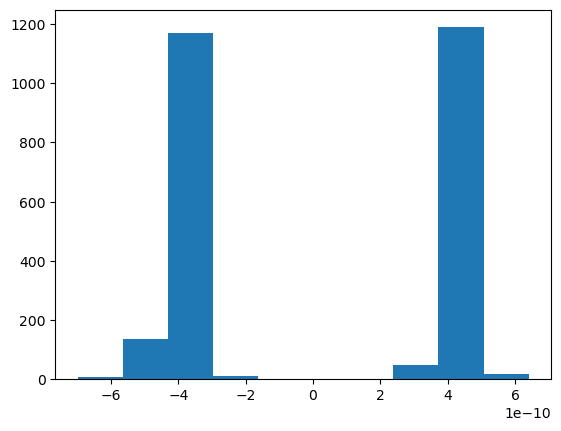

In [23]:
import matplotlib.pyplot as plt
residuals = SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [24]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 1.000
RSS is equal to 0.000
The intercept is 0.000
The slopes are [-2.13851008e-18 -4.11892742e-14  1.00000000e+00  2.49565559e-13
  1.14101437e-15  1.92328792e-14 -2.92821323e-15  1.32398432e-14
 -3.37728977e-15  6.92761820e-15 -1.29577338e-14 -1.65295295e-14
 -1.24602477e-14 -2.50356346e-12 -1.14894185e-12  8.78242122e-13
  8.78241133e-13  2.21554963e-13  8.16500553e-13 -5.45508574e-13
  1.33964020e-15  8.22838976e-15  1.03640241e-15 -5.46654735e-16
  1.25942984e-13 -2.63106052e-15 -2.48446080e-14  2.96670240e-15
 -3.38813179e-21 -2.11758237e-22 -1.43717110e-13  8.47032947e-22
 -1.69406589e-21  6.87147957e-13  4.79113406e-13 -1.22975999e-12
  1.51395821e-12 -1.45852805e-14 -1.07555063e-12  2.46687123e-12
  6.56528427e-14  2.30008851e-12  1.22528561e-13 -3.24070770e-13
 -1.82952619e-12 -5.98442248e-13  6.06227545e-14  4.73344264e-13
  2.16366188e-13  1.76210681e-13  1.50393696e-13  2.16235782e-13
  3.32368776e-13  7.64956123e-13  1.77883850e-13 -3.36865020e-13
  1.2242

In [25]:
print('negative slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ < 0]))
print('positive slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ > 0]))

negative slope column names Index(['PID', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'FullBath', 'HalfBath', 'GarageCars', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'YrSold', 'GarageYrBlt', 'MoSold',
       'YearRemodAdd', 'Street', 'LotShape', 'LandContour', 'Condition1',
       'Condition2', 'BldgType', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'HeatingQC', 'CentralAir', 'BsmtFullBath', 'Functional',
       'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
positive slope column names Index(['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       'TotalBsmtSF', 'KitchenAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'MiscVal', 'YearBuilt', 'MSSubClass', 'MSZoning', 'Alley', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Ho

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 1.000e+01,
        1.170e+02, 1.915e+03, 5.210e+02, 1.000e+01]),
 array([-1.28737225, -1.12066918, -0.95396611, -0.78726304, -0.62055997,
        -0.4538569 , -0.28715383, -0.12045076,  0.0462523 ,  0.21295537,
         0.37965844]),
 <BarContainer object of 10 artists>)

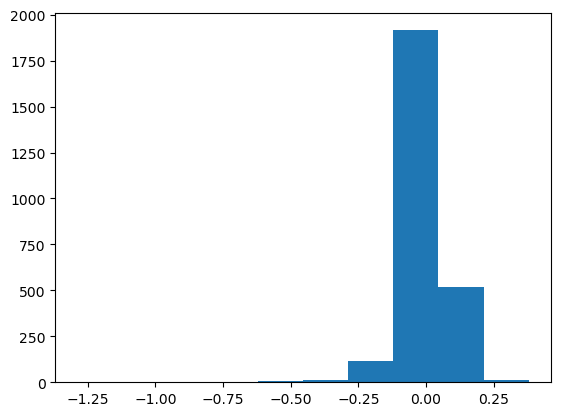

In [26]:
log_SalePrice = np.log(SalePrice) #Take log of DV
lm.fit(housing_factor_dummified1, log_SalePrice) #LM of log of DV
residuals = log_SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [27]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,log_SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.958
RSS is equal to 16.146
The intercept is 10.351
The slopes are [ 1.79002696e-11  2.70572344e-05  3.56404667e-06 -3.71579296e-05
  4.56977655e-07 -9.20900984e-05  3.40031172e-06  1.95610612e-05
  1.08252526e-05  3.37866256e-05  3.47248693e-05  7.38394041e-06
 -1.50515629e-05  2.87610439e-02  1.62109241e-02 -8.59311887e-03
 -8.59311887e-03  3.04895313e-03  7.63698009e-03  2.09710394e-02
 -2.53037803e-05  1.11238580e-06  2.12153687e-05  5.45795431e-05
  7.64326784e-05  8.39626284e-05  5.03002576e-05  9.82464663e-07
 -3.01841885e-16  1.63064007e-16 -7.40557976e-05  6.93889390e-18
  3.46944695e-18  2.32881983e-03 -1.15848423e-02  6.12380503e-02
  1.80405922e-02 -2.39430797e-03  2.72721864e-03 -4.09376299e-02
  1.63831133e-04  1.03903234e-02 -3.79404416e-04  1.98136714e-03
 -9.97794306e-03  2.40545650e-03 -2.06159200e-05  3.23889516e-02
  2.35049348e-02 -3.60827732e-03 -2.62096884e-04  2.16016650e-05
  2.24989638e-03 -7.33658268e-03  1.24830496e-02  8.02348114e-03
  1.11

In [28]:
scores = {}
for idx, name1 in enumerate(housing_factor_dummified1.columns):
        myColumns = housing_factor_dummified1.columns[(idx+1):]
        pass

In [29]:
from itertools import combinations 

scores = {}

combos = combinations(housing_factor_dummified1.columns, 3)

for c in combos:
    X = housing_factor_dummified1[list(c)]
    Y = log_SalePrice
    reg = LinearRegression().fit(X,Y)
    scores[c] = reg.score (X,Y)

In [30]:
sorted(scores.items(), key=lambda features_score: abs(features_score [1]), reverse = True)

[(('SalePrice', 'OverallQual', 'CentralAir'), 0.9335139587093141),
 (('SalePrice', 'OverallQual', 'PavedDrive'), 0.9307352599242298),
 (('SalePrice', 'OverallQual', 'GarageType'), 0.9299464898459083),
 (('SalePrice', 'OverallQual', 'GarageCond'), 0.9298411132584817),
 (('SalePrice', 'OverallQual', 'GarageQual'), 0.928336879056669),
 (('SalePrice', 'OverallQual', 'ExterQual'), 0.9269506262461966),
 (('SalePrice', 'OverallQual', 'BedroomAbvGr'), 0.9265768921309104),
 (('SalePrice', 'GarageCars', 'OverallQual'), 0.9261280415016706),
 (('SalePrice', 'OverallQual', 'OverallCond'), 0.9259767470985246),
 (('SalePrice', 'OverallQual', 'Electrical'), 0.9257922076690069),
 (('SalePrice', 'OverallQual', 'BsmtFinType1'), 0.9257661555242438),
 (('SalePrice', 'FullBath', 'OverallQual'), 0.9257446506807475),
 (('GrLivArea', 'SalePrice', 'OverallQual'), 0.9257284408135782),
 (('SalePrice', 'GarageArea', 'OverallQual'), 0.9251465920016113),
 (('SalePrice', 'TotRmsAbvGrd', 'OverallQual'), 0.925110302336

In [31]:
import statsmodels.api as sm
x = sm.add_constant(housing_factor_dummified1)
model = sm.OLS(log_SalePrice, x.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     766.7
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:01:23   Log-Likelihood:                 2884.4
No. Observations:                2580   AIC:                            -5617.
Df Residuals:                    2504   BIC:                            -5172.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.874e-07   4.12e-08     14.253      0.000    5.07e-07    6.68e-07
PID             1.79e-11   1.05e-11      1.705      0.088   -2.69e-12    3.85e-11
GrLivArea      2.706e-05   1.11e-05      2.442      0.015    5.33e-06    4.88e-05
SalePrice      3.564e-06   6.18e-08     57.662      0.000    3.44e-06    3.69e-06
LotFrontage   -3.716e-05   5.41e-05     -0.687      0.492      -0.000     6.9e-05
LotArea         4.57e-07   2.42e-07      1.887      0.059   -1.79e-08    9.32e-07
MasVnrArea    -9.209e-05   1.21e-05     -7.582      0.000      -0.000   -6.83e-05
BsmtFinSF1       3.4e-06   5.56e-06      0.611      0.541   -7.51e-06    1.43e-05
BsmtFinSF2     1.956e-05   1.02e-05      1.916      0.055   -4.57e-07    3.96e-05
BsmtUnfSF      1.083e-05   5.25e-06      2.062      0.039     5.3e-07    2.11e-05
TotalBsmtSF    3.379e-05   6.36e-06      5.316      0.000    2.13e-05    4.62e-05
1stFlrSF       3.472e-05   1.14e-05      3.050      0.002    1.24e-05    5.71e-05
2ndFlrSF       7.384e-06   1.06e-05      0.699      0.485   -1.33e-05    2.81e-05
LowQualFinSF  -1.505e-05   2.81e-05     -0.536      0.592   -7.01e-05       4e-05
FullBath          0.0288      0.005      5.964      0.000       0.019       0.038
HalfBath          0.0162      0.005      3.432      0.001       0.007       0.025
KitchenAbvGr     -0.0086      0.006     -1.534      0.125      -0.020       0.002
KitchenAbvGr     -0.0086      0.006     -1.534      0.125      -0.020       0.002
TotRmsAbvGrd      0.0030      0.002      1.361      0.174      -0.001       0.007
Fireplaces        0.0076      0.003      2.431      0.015       0.001       0.014
GarageCars        0.0210      0.005      3.992      0.000       0.011       0.031
GarageArea     -2.53e-05   1.82e-05     -1.388      0.165    -6.1e-05    1.04e-05
WoodDeckSF     1.112e-06   1.39e-05      0.080      0.936   -2.62e-05    2.84e-05
OpenPorchSF    2.122e-05   2.68e-05      0.790      0.429   -3.14e-05    7.39e-05
EnclosedPorch  5.458e-05    2.7e-05      2.021      0.043    1.61e-06       0.000
3SsnPorch      7.643e-05   6.34e-05      1.205      0.228    -4.8e-05       0.000
ScreenPorch    8.396e-05   2.95e-05      2.842      0.005     2.6e-05       0.000
PoolArea        5.03e-05   5.92e-05      0.850      0.396   -6.58e-05       0.000
MiscVal        9.825e-07   3.32e-06      0.296      0.767   -5.52e-06    7.49e-06
YrSold            0.0013   8.87e-06    148.023      0.000       0.001       0.001
GarageYrBlt       0.0013   8.87e-06    148.023      0.000       0.001       0.001
MoSold        -7.406e-05      0.001     -0.123      0.902      -0.001       0.001
YearBuilt         0.0013   8.87e-06    148.023      0.000       0.001       0.001
YearRemodAdd      0.0013   8.87e-06    148.023      0.000       0.001       0.001
MSSubClass        0.0023      0.001      2.993   

In [32]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues < .05].sort_values()

The significant coefficients


SalePrice        0.000000e+00
YearRemodAdd     0.000000e+00
YearBuilt        0.000000e+00
GarageYrBlt      0.000000e+00
YrSold           0.000000e+00
OverallQual      3.697415e-81
const            2.241573e-44
OverallCond      6.344109e-40
CentralAir       5.413362e-22
MasVnrArea       4.779368e-14
PavedDrive       4.877701e-13
GarageType       7.313721e-13
SaleCondition    8.373923e-12
FullBath         2.803566e-09
TotalBsmtSF      1.152365e-07
MSZoning         5.425963e-07
GarageCond       8.724053e-07
HeatingQC        1.727613e-06
BsmtFinType1     4.351260e-06
GarageCars       6.728796e-05
Foundation       1.360744e-04
ExterCond        3.684908e-04
HalfBath         6.098008e-04
ExterQual        1.016301e-03
1stFlrSF         2.313485e-03
MSSubClass       2.791575e-03
BsmtFullBath     2.970604e-03
Electrical       3.406810e-03
ScreenPorch      4.525190e-03
Alley            9.729779e-03
Exterior2nd      1.261188e-02
GrLivArea        1.465951e-02
Fireplaces       1.511968e-02
MasVnrType

In [33]:
print('The insignificant coefficients')
pValues[pValues > .05]

The insignificant coefficients


PID             0.088311
LotFrontage     0.492355
LotArea         0.059272
BsmtFinSF1      0.541144
BsmtFinSF2      0.055460
2ndFlrSF        0.484904
LowQualFinSF    0.591905
KitchenAbvGr    0.125054
KitchenAbvGr    0.125054
TotRmsAbvGrd    0.173604
GarageArea      0.165219
WoodDeckSF      0.936381
OpenPorchSF     0.429425
3SsnPorch       0.228348
PoolArea        0.395553
MiscVal         0.767079
MoSold          0.902339
LotShape        0.067286
LandContour     0.305221
Utilities       0.492151
LotConfig       0.875287
LandSlope       0.186401
Neighborhood    0.140821
Condition1      0.309614
Condition2      0.197894
BldgType        0.247077
HouseStyle      0.986660
RoofStyle       0.098944
RoofMatl        0.932518
Exterior1st     0.982746
BsmtQual        0.176687
BsmtCond        0.445502
BsmtExposure    0.140527
BsmtFinType2    0.380129
Heating         0.212689
BsmtHalfBath    0.890602
KitchenQual     0.713431
Functional      0.214478
GarageFinish    0.715558
PoolQC          0.180858
